In [3]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


### Features :

Pregnancies: Le nombre de grossesses que la personne a eues.

Glucose: La concentration de glucose dans le plasma sanguin, mesurée en milligrammes par décilitre (mg/dL). C'est un indicateur important pour évaluer le métabolisme du glucose, et des niveaux élevés peuvent indiquer une résistance à l'insuline.

BloodPressure: La pression artérielle en millimètres de mercure (mmHg). Cela mesure la force exercée par le sang sur les parois des vaisseaux sanguins.

SkinThickness: L'épaisseur du pli cutané, mesurée en millimètres. Cela peut être un indicateur de la quantité de tissu adipeux sous-cutané.

Insulin: La mesure des niveaux d'insuline dans le sang, mesurée en micro-unités internationales par millilitre (µU/mL). L'insuline est une hormone produite par le pancréas et est cruciale dans le métabolisme du glucose.

BMI (Body Mass Index): L'indice de masse corporelle, calculé en divisant le poids en kilogrammes par le carré de la taille en mètres. C'est une mesure courante pour évaluer si une personne a un poids normal, en surpoids ou sous-poids.

DiabetesPedigreeFunction: Une fonction qui évalue la probabilité de développer le diabète en fonction de l'hérédité génétique. Elle combine l'historique familial avec d'autres facteurs.

Age: L'âge de la personne en années.

Outcome: La variable cible binaire, indiquant si la personne est atteinte de diabète (1) ou non (0). C'est la variable que l'on cherche généralement à prédire dans un contexte d'analyse de données liées au diabète.

Ces colonnes sont couramment utilisées dans des ensembles de données liés au diabète pour évaluer les facteurs de risque et construire des modèles prédictifs pour détecter la présence du diabète chez les individus. L'analyse de ces données peut aider à comprendre les relations entre ces variables et à développer des stratégies pour prévenir ou gérer le diabète.

In [4]:
df = pd.read_csv('ressources/diabetes.csv')

colonnes = ['BMI','Insulin', 'SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']

imputer = KNNImputer(missing_values=0, n_neighbors=5)

colonne_imputed = imputer.fit_transform(df[colonnes])

df[colonnes] = colonne_imputed

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,121.8,33.60,0.627,50.0,1
1,1,85,66.0,29.0,164.0,26.60,0.351,31.0,0
2,8,183,64.0,26.2,123.0,23.30,0.672,32.0,1
3,1,89,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0,137,40.0,35.0,168.0,43.10,2.288,33.0,1
5,5,116,74.0,21.0,100.4,25.60,0.201,30.0,0
6,3,78,50.0,32.0,88.0,31.00,0.248,26.0,1
7,10,115,72.0,29.8,184.8,35.30,0.134,29.0,0
8,2,197,70.0,45.0,543.0,30.50,0.158,53.0,1
9,8,125,96.0,30.0,209.0,33.22,0.232,54.0,1


In [5]:
X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=y)

model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

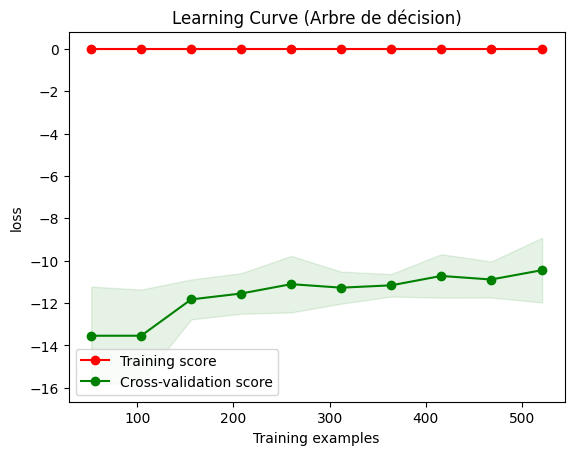

In [6]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_log_loss'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (Arbre de décision)")
plt.xlabel("Training examples")
plt.ylabel("loss")


# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()

In [7]:
#modelisation avec randomforest pour réduire l'overfitting

model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


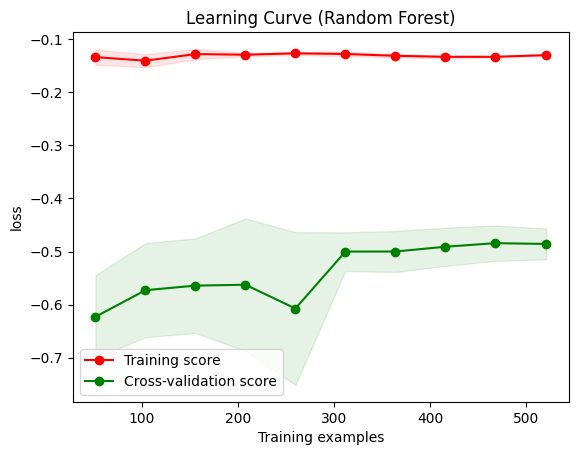

In [8]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_log_loss'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("loss")


# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()

Comparaison des modèles :<br><br>
Sur la courbe de l'arbre de décision, on voit un écart important entre les scores d'entraînement et de validation, ce qui indique un surajustement : le modèle fonctionne très bien sur l'ensemble d'entraînement mais nettement moins bien sur l'ensemble de validation.

En revanche, la courbe pour la forêt aléatoire montre des scores d'entraînement et de validation un peu plus proches l'un de l'autre, ce qui suggère une meilleure généralisation du modèle aux données qu'il n'a pas encore vues. De plus, la perte sur l'ensemble de validation est plus faible que celle de l'arbre de décision, ce qui confirme que le modèle de forêt aléatoire a une meilleure performance sur des données non vues.

Ces courbes confirment donc que, bien que l'arbre de décision puisse avoir une précision élevée sur les données d'entraînement, il n'est pas aussi fiable que la forêt aléatoire lorsqu'il s'agit de généraliser à de nouvelles données. La forêt aléatoire offre un meilleur équilibre entre la capacité d'apprentissage et la capacité de généralisation, ce qui est crucial pour des prédictions fiables dans des situations réelles.